# Laboratorio 5 - Parte 2
#### Sebastian Aristondo 20880
#### Daniel Gonzalez 20293

## Ejercicio 2

In [36]:
import random
from PIL import Image
from IPython.display import display, Image as IPImage
import matplotlib.pyplot as plt

In [37]:
HEIGHT = 1
WIDTH = 200

carril1 = 0.1
carril2 = 0.3
carril3 = 0.5

acceleration_ferrari = 5
acceleration_escarabajo = 3

In [38]:
class Escarabajo(object):
    def __init__(self, cars):
        self.x = 0
        carril = random.random()
        if carril < 0.3:
            self.y = carril1
        elif carril < 0.6:
            self.y = carril2
        else:
            self.y = carril3
        self.acceleration = acceleration_escarabajo
        self.cars = cars
        self.dead = False

    def check_collision(self, acceleration):
        for car in self.cars:
            for i in range(self.x, self.x + acceleration):
                if car.x == i and car.y == self.y and not car.dead and car != self:
                    self.dead = True
                    car.dead = True
                    return True
                
        return False
    
    def change_lane(self):
        can_change = True
        x, y = self.x, self.y
        for car in self.cars:
            if car != self:
                if not(car.x + 5 < x):
                    can_change = False

        acceleration = self.acceleration
        if can_change:
            if self.y == carril1:
                self.y = carril2
            elif self.y == carril2:
                if random.random() < 0.5:
                    self.y = carril1
                else:
                    self.y = carril3
            else:
                self.y = carril2
            self.check_collision(acceleration)
            self.x += acceleration
        else:
            self.check_collision(acceleration)
            self.x += acceleration
        
    
    def move(self):
        if random.random() < 0.4:
            self.change_lane()
        else:
            # acceleration = random.randint(1, self.acceleration)
            self.check_collision(self.acceleration)
            self.x += self.acceleration
            

In [39]:
class Ferrari(object):
    def __init__(self, cars):
        self.x = 0
        carril = random.random()
        if carril < 0.3:
            self.y = carril1
        elif carril < 0.6:
            self.y = carril2
        else:
            self.y = carril3
        self.acceleration = acceleration_ferrari
        self.cars = cars
        self.dead = False

    def check_collision(self, acceleration):
        for car in self.cars:
            for i in range(self.x, self.x + acceleration):
                if car.x == i and car.y == self.y and not car.dead and car != self:
                    self.dead = True
                    car.dead = True
                    return True
                
        return False
    
    def change_lane(self):
        if self.y == carril1:
            self.y = carril2
        elif self.y == carril2:
            if random.random() < 0.5:
                self.y = carril1
            else:
                self.y = carril3
        else:
            self.y = carril2
        self.check_collision(self.acceleration)
        self.x += self.acceleration
        
        

    def move(self):
        if random.random() < 0.7:
            self.change_lane()
        else:
            acceleration = random.randint(0, self.acceleration)
            self.check_collision(acceleration)
            self.x += acceleration
            

In [40]:
count_cars = 100
cars = []

In [41]:
def spawn_new_car():
    if random.random() < 0.5:
        cars.append(Escarabajo(cars))
    else:
        cars.append(Ferrari(cars))

Simulacion de tráfico


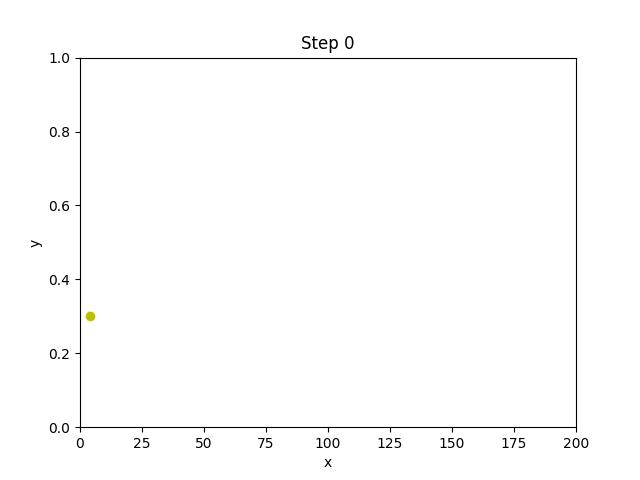

In [42]:
epochs = 100
list_images = []
xd = True

for step in range(epochs):
    x_escarabajo = []
    y_escarabajo = []

    x_ferrari = []
    y_ferrari = []

    x_crashed = []
    y_crashed = []
    if random.random() < 0.65:
        xd = False
        spawn_new_car()
    for car in cars:
        if car.dead:
            if random.random() < 0.4:
                cars.remove(car)
            else:
                x_crashed.append(car.x)
                y_crashed.append(car.y)
        elif isinstance(car, Escarabajo):
            car.move()
            x_escarabajo.append(car.x)
            y_escarabajo.append(car.y)
        else:
            car.move()
            x_ferrari.append(car.x)
            y_ferrari.append(car.y)

    plt.plot(x_escarabajo, y_escarabajo, "go")
    plt.plot(x_ferrari, y_ferrari, "yo")
    plt.plot(x_crashed, y_crashed, "ro")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Step "+str(step))
    plt.xlim(0, WIDTH)
    plt.ylim(0, HEIGHT)
    name =  "Cars/step_"+str(step)+".jpg"
    plt.savefig(name, format="jpg")
    plt.close()
    list_images.append(name)


images = [Image.open(path) for path in list_images]
print("Simulacion de tráfico")
# Save the images as an animated GIF
gif_path = "Carros.gif"  # Specify the path for the GIF file
images[0].save(gif_path, save_all=True, append_images=images[1:], loop=0, duration=300)
display(IPImage(filename=gif_path))

¿Qué comportamientos puede observar en los diferentes tipos de comportamiento de manejo de
vehículos?
Se puede observar que una gran cantidad de accidentes se dan por los vehículos que se cambian de carril agresivamente. Sin embargo, también se observa que los vehículos que van lento causan accidentes, porque hacen que el tráfico se acumule y sea más probable un choque. Eso es algo interesante, porque se pensaría que los vehículos prudentes son menos propensos a tener y causar accidentes. Por otra parte, los vehículos imprudentes en ocasiones causan que en el choque estén incluídos, no solo otro carro y él, si no que un tercero también, en caso estén muy cerca. En general, los choques se dan más entre vehículos imprudentes contra un vehículo prudente.

¿Cómo mejoraría este modelo?
Se podría mejorar agregando más carriles a la simulación, además de poder manejar una velocidad más realista, usando una ecuación física. También se podría manejar mecanismos de freno por parte de los vehículos, de forma que se puedan producir accidentes por esta razón también. Agregaría vehículos más largos, porque estos pueden ocasionar también accidentes y sería interesante tener una probabilidad de perder los frenos. Algo extra sería usar condiciones del asfalto, por ejemplo, si está mojado se podría tener una probabilidad de que los vehículos se resbalen y choquen.

